<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/Google_CaseStudy_Bike_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section A: Case Study Roadmap - Ask

**Guiding questions**

*   What is the problem you are trying to solve?
*   How can your insights drive business decisions?

**Key Tasks**

1.   Identify the business task
2.   Consider key stakeholders

**Deliverable**

*   A clear statement of the business task



#####**Problem Statement:** The problem I am trying to solve is to identify the usage patterns and how it differs between the two category of users i.e. Casual riders and Annual members.




#####**Driving Business Decisions:** Digging down to identify the patterns will reveal the common needs of the casual bike users. There is also the likelihood that the needs of one group of users will be significantly different from the other user groups. For example, certain locations could be more popular with the casual riders category. We can target specific campaigns to increase membership subscription</n>


#####**Business Task:** The business task is to design marketing strategies aimed at converting casual riders into annual members. This involves analyzing historical bike trip data to understand how annual members and casual riders use Cyclistic bikes differently, and using these insights to inform our marketing strategies.</n>


#####**Key Stakeholders:** The key stakeholders in this project include:

1.   **Lily Moreno**, director of marketing
2.   **Cyclistic marketing analytics team**, team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy
3.   **Cyclistic executive team:**, the team with the authority to approve the marketing campaign

#Section B: Case Study Roadmap - Prepare

**Guiding questions**

* Where is your data located?
* How is the data organized?
* Are there issues with bias or credibility in this data? Does your data ROCCC?
* How are you addressing licensing, privacy, security, and accessibility?
* How did you verify the data’s integrity?
* How does it help you answer your question?
* Are there any problems with the data?


**Key Tasks**

1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.


**Deliverable**

*   A description of all data sources used


**Data Location:** The Case Study data is located in the online Amazon S3 repository [dataset](https://divvy-tripdata.s3.amazonaws.com/index.html).

**Data Organization** Data is organized into CSV files. Each file contains a month of trip data from the Cyclistic bike share program. Every CSV contains common columns about individual trips, including start and end times, start and end stations, ride duration, and whether the rider was a casual rider or a member. There are a total of 13 columns.

**Bias and Credibility** data is collected from the internal database of the company conducting the analysis so it's credible. If there are other categories of users apart from casual or annual members or trips from selected stations are recorded in the csv, it could introduce bias in our analysis.

**Licensing, privacy, security, and accessibility** the data is made publicly available by Motivate International Inc. and does not contain personally identifiable information about the riders, which helps protect their privacy. License allows the use of the Data for any lawful purpose.

To verify the data’s integrity, I will check for missing or inconsistent values.

In [10]:
import requests
import pandas as pd
import zipfile
import os
import glob
import matplotlib.pyplot as plt

In [11]:
"""
urls = [
    "https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip"
]
"""

'\nurls = [\n    "https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip",\n    "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip",\n    "https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip"\n]\n'

# Section C: Upload the Zipped data, convert to CSV and concaternate dataframe

In [12]:
# Directory to save and unzip the files
directory = "/content/sample_data"

# List of local file paths
file_paths = [
    "/content/202101-divvy-tripdata.zip",
    "/content/202102-divvy-tripdata.zip",
    "/content/202103-divvy-tripdata.zip"
]

for file_path in file_paths:
    # Open the zipfile
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Extract all the contents of the zipfile into the directory
        zip_ref.extractall(directory)

# Get a list of all CSV files in the directory
csv_files = glob.glob('/content/sample_data/*.csv')

# Read all CSV files into a list of DataFrames
dataframes = [pd.read_csv(filename) for filename in csv_files]

# Concatenate all the DataFrames in the list into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)


In [13]:
all_data.sort_values('started_at',inplace=False).head(10)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
302166,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,NaN,NaN,NaN,NaN,41.980000,-87.650000,41.980000,-87.660000,member
306832,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member
268457,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member
262542,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,Kedzie Ave & Milwaukee Ave,13085,NaN,NaN,41.929528,-87.707899,41.920000,-87.720000,member
262412,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member
262420,938D5D1998A5470E,classic_bike,2021-01-01 00:12:27,2021-01-01 00:12:30,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,casual
315033,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member
240158,800D57DEC9A6D587,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,-87.652338,casual
240157,27B02C8B1AFAD968,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,-87.652310,member
256124,89DA64E9078B63B1,classic_bike,2021-01-01 00:15:08,2021-01-01 00:18:26,MLK Jr Dr & 29th St,TA1307000139,Calumet Ave & 33rd St,13217,41.842052,-87.617000,41.834900,-87.617930,member


In [14]:
# Get the number of rows and columns
rows, cols = all_data.shape

# Print the number of rows and columns
print(f"There are {rows} rows and {cols} columns in the dataset.")


There are 374952 rows and 13 columns in the dataset.


In [15]:
# check the Datatypes
all_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [16]:
# Calculate the sum of missing values
missing_values_sum = all_data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values and round it to 2 decimal places
missing_values_percentage = (all_data.isnull().sum() / all_data.shape[0] * 100).round(2).sort_values(ascending=False)

# Create a DataFrame from the sums and percentages
missing_values_df = pd.DataFrame({'Missing Values': missing_values_sum, 'Percentage %': missing_values_percentage})

# Display the DataFrame
missing_values_df


,Missing Values,Percentage %
end_station_name,32362,8.63
end_station_id,32362,8.63
start_station_name,27519,7.34
start_station_id,27519,7.34
end_lat,484,0.13
end_lng,484,0.13
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00


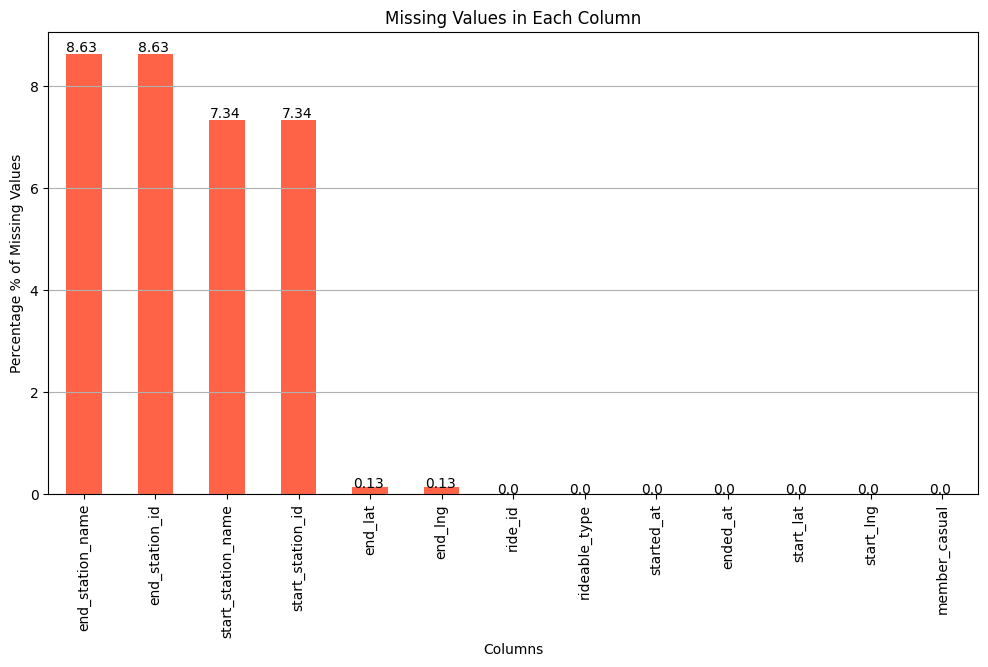

In [17]:
# Create a bar chart of the missing values
ax = missing_values_df['Percentage %'].plot(kind='bar', figsize=(12, 6), color='tomato')

# Set the title and labels
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage % of Missing Values')

# Add gridlines
plt.grid(axis='y')

# Show the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()


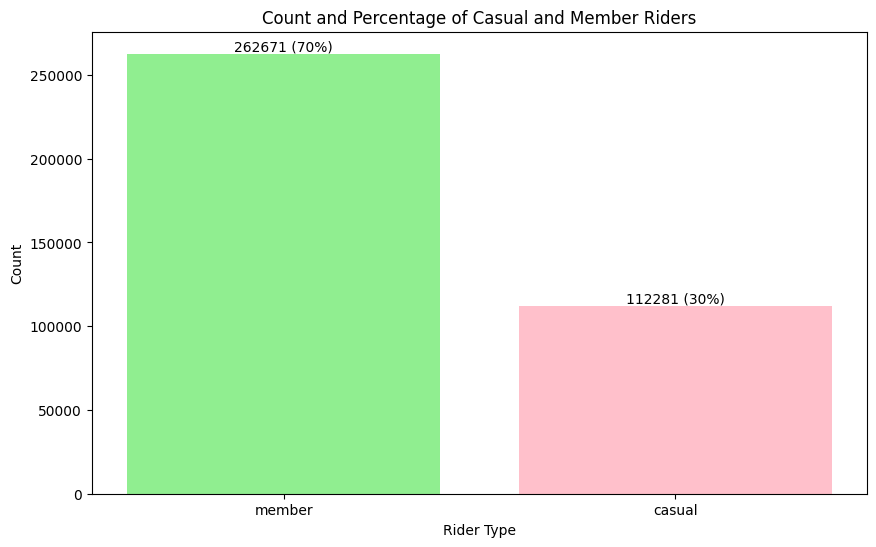

In [18]:
counts = all_data['member_casual'].value_counts()
percentages = all_data['member_casual'].value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))

# Bar chart for counts
bars = plt.bar(counts.index, counts, color=['lightgreen', 'pink'])
plt.ylabel('Count')
plt.title('Count and Percentage of Casual and Member Riders')
plt.xlabel('Rider Type')

# Add count and percentage on top of each bar
for bar, count, percentage in zip(bars, counts, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{count} ({percentage:.0f}%)', ha='center', va='bottom')

plt.show()


### Create a column called **“ride_length”** Calculate the length of each ride by subtracting the column **“started_at”** from the column **“ended_at”** and format as HH:MM:SS

In [19]:
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])

all_data['ride_length'] = all_data['ended_at'] - all_data['started_at']

# Convert 'ride_length' to HH:MM:SS format
all_data['ride_length'] = all_data['ride_length'].dt.total_seconds().astype(int).apply(lambda x: '{:02d}:{:02d}:{:02d}'.format(x // 3600, (x % 3600 // 60), x % 60))


In [20]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,00:04:04
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,00:10:27
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,00:16:24
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,00:28:59
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,00:17:56


In [21]:
# Assuming all_data is your DataFrame
all_data['day_of_week'] = all_data['started_at'].dt.dayofweek
all_data
# Assuming all_data is your DataFrame
day_mapping = {1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday', 7: 'Monday'}
all_data['days_of_week'] = all_data['day_of_week'].map(day_mapping)


In [22]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,days_of_week
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,00:04:04,1,Tuesday
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,00:10:27,6,Sunday
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,00:16:24,3,Thursday
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,00:28:59,3,Thursday
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,00:17:56,6,Sunday


In [23]:
#removing the columns ride_id, start_lat, start_lng, end_lat, end_long and day_of_week as these do not contain useful information for analysis

# Assuming all_data is your DataFrame
columns_to_drop = ['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'day_of_week']
all_data = all_data.drop(columns=columns_to_drop)
all_data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days_of_week
0,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,casual,00:04:04,Tuesday
1,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,casual,00:10:27,Sunday
2,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,casual,00:16:24,Thursday
3,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,casual,00:28:59,Thursday
4,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,casual,00:17:56,Sunday


In [24]:
# where start_station_name, end_station_name is replace, replace with value 'Unknown'. Where

# Assuming all_data is your DataFrame
null_rows = all_data[all_data['days_of_week'].isnull()]
null_rows.head(10)


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days_of_week
12,classic_bike,2021-03-01 17:37:12,2021-03-01 18:00:18,Halsted St & 21st St,13162,Halsted St & Clybourn Ave,331,member,00:23:06,NaN
16,electric_bike,2021-03-22 11:51:25,2021-03-22 11:53:57,Glenwood Ave & Touhy Ave,525,Greenview Ave & Jarvis Ave,520,member,00:02:32,NaN
17,classic_bike,2021-03-22 15:48:20,2021-03-22 15:51:44,Glenwood Ave & Touhy Ave,525,Greenview Ave & Jarvis Ave,520,member,00:03:24,NaN
44,classic_bike,2021-03-22 17:04:19,2021-03-22 17:46:48,Damen Ave & Madison St,13134,Halsted St & Dickens Ave,13192,member,00:42:29,NaN
58,classic_bike,2021-03-08 07:04:17,2021-03-08 07:08:57,Southport Ave & Clybourn Ave,TA1309000030,Halsted St & Dickens Ave,13192,member,00:04:40,NaN
60,classic_bike,2021-03-22 17:37:52,2021-03-22 18:20:01,Lake Shore Dr & Monroe St,13300,Montrose Harbor,TA1308000012,member,00:42:09,NaN
61,classic_bike,2021-03-22 17:21:30,2021-03-22 17:27:19,Southport Ave & Clybourn Ave,TA1309000030,Halsted St & Dickens Ave,13192,casual,00:05:49,NaN
62,classic_bike,2021-03-29 12:09:29,2021-03-29 12:32:20,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Montrose Harbor,TA1308000012,casual,00:22:51,NaN
63,classic_bike,2021-03-22 18:45:36,2021-03-22 19:10:16,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Montrose Harbor,TA1308000012,casual,00:24:40,NaN
64,classic_bike,2021-03-22 17:21:32,2021-03-22 17:27:23,Southport Ave & Clybourn Ave,TA1309000030,Halsted St & Dickens Ave,13192,casual,00:05:51,NaN
